In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("dataset.csv")  # Change this to your file path if needed

# 1. Column Descriptions
column_descriptions = {
    "Recipe_ID": "Unique identifier for each recipe.",
    "Recipe Name": "Name/title of the recipe.",
    "Cuisine": "Type of cuisine (e.g., Cajun, Indian).",
    "Category": "Category or classification of the dish (e.g., Gumbo, Dessert).",
    "Prep Time": "Time (in minutes) to prepare the ingredients.",
    "Cook Time": "Time (in minutes) to cook the dish.",
    "Total Time": "Sum of prep and cook time.",
    "Servings": "Number of servings the recipe yields.",
    "Ingredients": "List of ingredients required.",
    "Directions": "Step-by-step cooking instructions.",
    "Nutrients": "Dictionary of nutritional values (e.g., calories, fat, etc.).",
    "Keywords": "Tags or keywords describing the recipe.",
    "Source": "Source website or publication.",
    "URL": "Link to the full recipe.",
    "Image_ID": "Identifier for the recipe image.",
    "Image_URL": "Link to the image of the dish.",
    "NA_Image": "Image availability flag.",
    "Language": "Language of the recipe text.",
    "Ratings": "Average user rating.",
    "Ratings_Count": "Number of ratings submitted.",
    "Description": "Brief description or notes about the recipe."
}

print("COLUMN DESCRIPTIONS")
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

# 2. Detect Noise (basic checks)
print("\nNOISE CHECKS")
noise_report = {}

# Check for non-numeric values in numeric columns
numeric_cols = ['Prep Time', 'Cook Time', 'Total Time', 'Ratings', 'Ratings_Count']
for col in numeric_cols:
    invalid = pd.to_numeric(df[col], errors='coerce').isna()
    count_invalid = invalid.sum()
    if count_invalid > 0:
        noise_report[col] = f" {count_invalid} non-numeric or invalid values."

# Check for logical issues: Total Time != Prep + Cook
time_mismatch = df['Total Time'] != (df['Prep Time'] + df['Cook Time'])
if time_mismatch.sum() > 0:
    noise_report['Total Time'] = f" {time_mismatch.sum()} mismatches with Prep + Cook Time."

for key, value in noise_report.items():
    print(f"{key}: {value}")

# 3. Missing Values Report
print("\n🔹 MISSING VALUES")
missing = df.isnull().sum()
missing_report = missing[missing > 0]
if not missing_report.empty:
    print(missing_report)
else:
    print(" No missing values found.")



COLUMN DESCRIPTIONS
Recipe_ID: Unique identifier for each recipe.
Recipe Name: Name/title of the recipe.
Cuisine: Type of cuisine (e.g., Cajun, Indian).
Category: Category or classification of the dish (e.g., Gumbo, Dessert).
Prep Time: Time (in minutes) to prepare the ingredients.
Cook Time: Time (in minutes) to cook the dish.
Total Time: Sum of prep and cook time.
Servings: Number of servings the recipe yields.
Ingredients: List of ingredients required.
Directions: Step-by-step cooking instructions.
Nutrients: Dictionary of nutritional values (e.g., calories, fat, etc.).
Keywords: Tags or keywords describing the recipe.
Source: Source website or publication.
URL: Link to the full recipe.
Image_ID: Identifier for the recipe image.
Image_URL: Link to the image of the dish.
NA_Image: Image availability flag.
Language: Language of the recipe text.
Ratings: Average user rating.
Ratings_Count: Number of ratings submitted.
Description: Brief description or notes about the recipe.

NOISE CHE

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast


df = pd.read_csv("dataset.csv")

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("🔹 Dataset Info:")
print(df.info())
print("\n🔹 Descriptive Statistics:")
print(df.describe(include='all'))


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584639 entries, 0 to 584638
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Recipe_ID      584639 non-null  int64  
 1   Recipe Name    584639 non-null  object 
 2   Cuisine        584639 non-null  object 
 3   Category       579892 non-null  object 
 4   Prep Time      568026 non-null  float64
 5   Cook Time      493990 non-null  float64
 6   Total Time     581353 non-null  float64
 7   Servings       583726 non-null  object 
 8   Ingredients    584639 non-null  object 
 9   Directions     584639 non-null  object 
 10  Nutrients      584639 non-null  object 
 11  Keywords       550189 non-null  object 
 12  Source         584639 non-null  object 
 13  URL            584639 non-null  object 
 14  Image_ID       584639 non-null  int64  
 15  Image_URL      584639 non-null  object 
 16  NA_Image       584639 non-null  int64  
 17  Language     

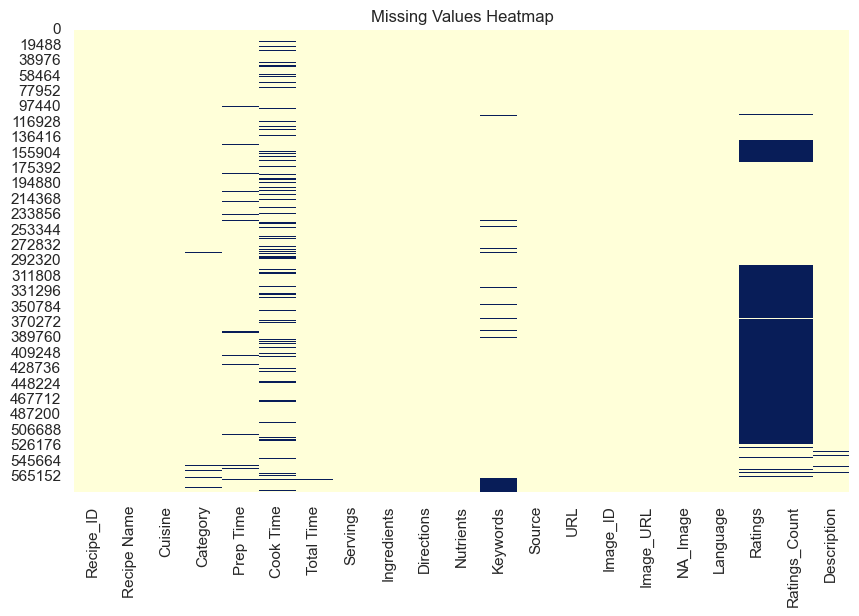

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/519655689.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


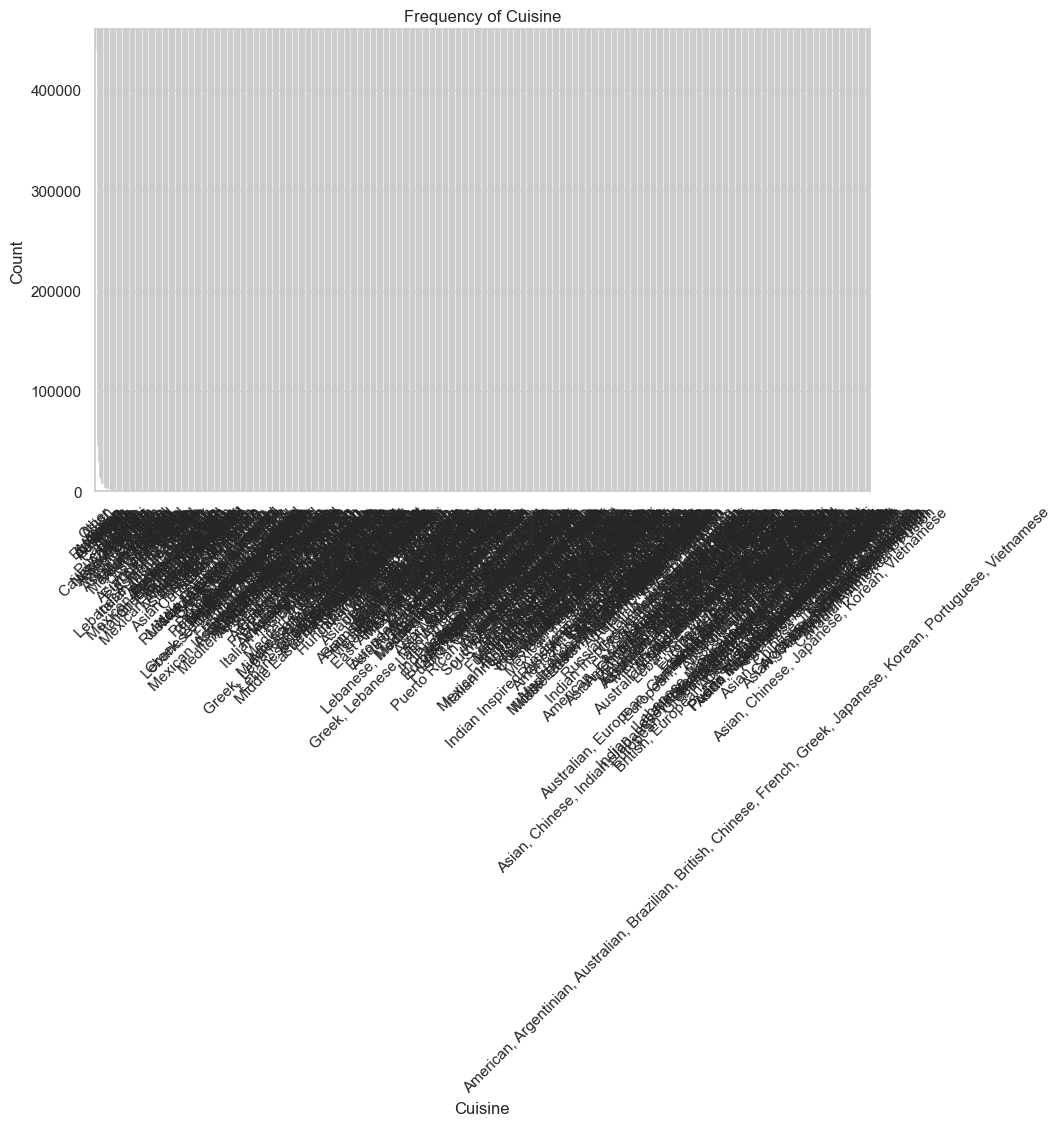

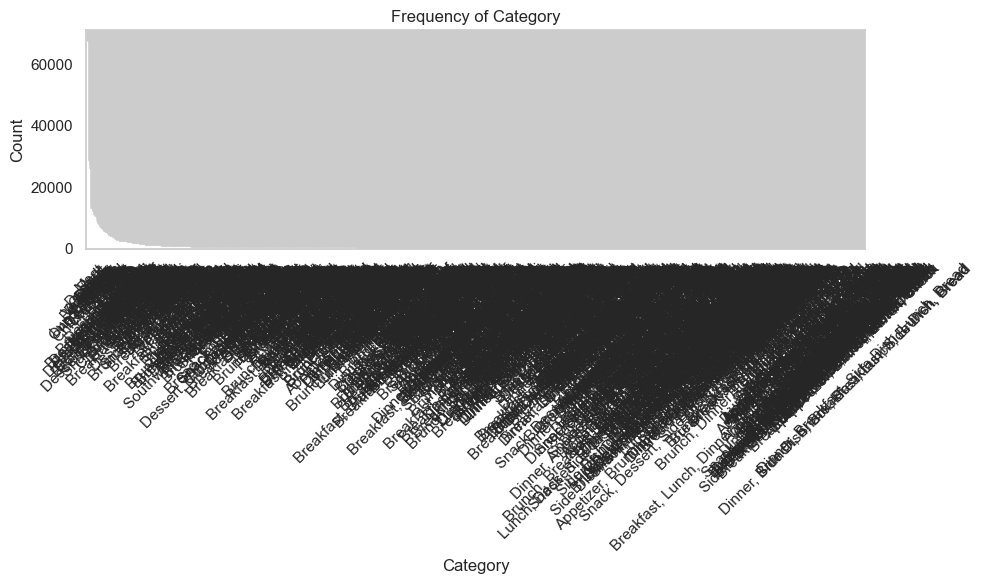

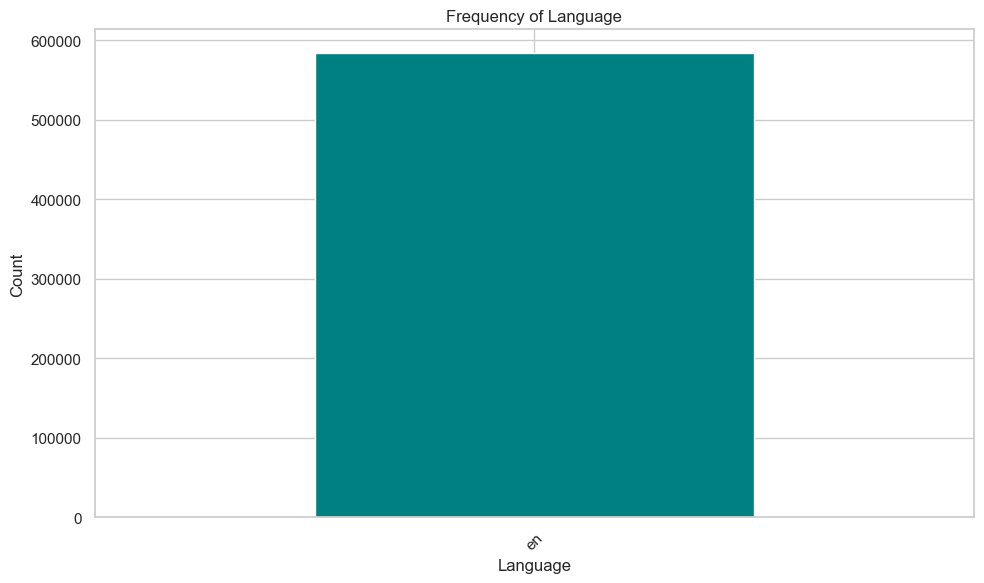

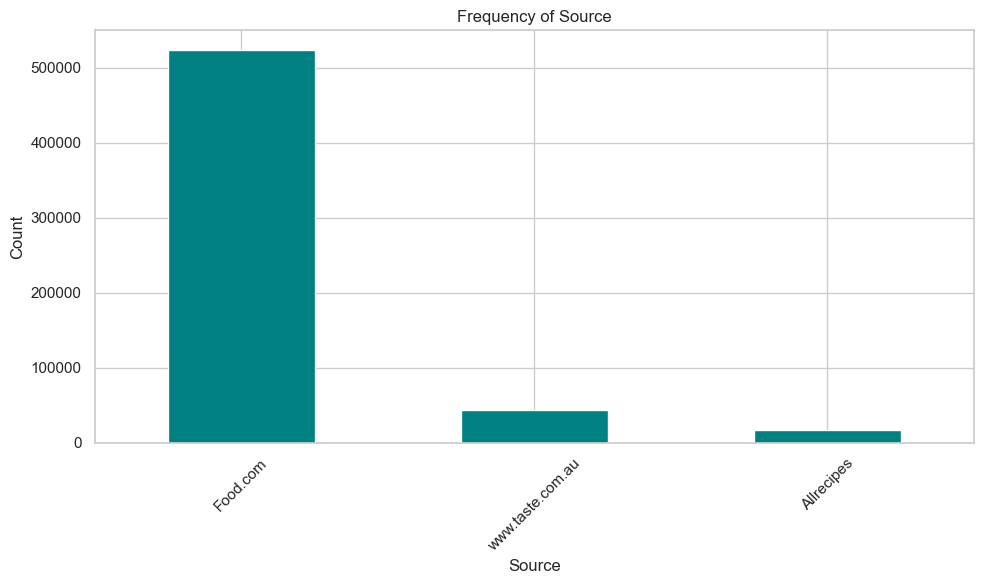

Prep Time Statistics:
count    5.680260e+05
mean     5.592136e+01
std      2.969919e+03
min      1.000000e+00
25%      1.000000e+01
50%      1.500000e+01
75%      2.000000e+01
max      1.440000e+06
Name: Prep Time, dtype: float64

Cook Time Statistics:
count    4.939900e+05
mean     2.154161e+02
std      6.407186e+04
min      1.000000e+00
25%      1.500000e+01
50%      2.600000e+01
75%      5.000000e+01
max      4.354560e+07
Name: Cook Time, dtype: float64

Total Time Statistics:
count    5.813530e+05
mean     2.404848e+02
std      5.917461e+04
min      1.000000e+00
25%      2.200000e+01
50%      4.000000e+01
75%      7.000000e+01
max      4.355280e+07
Name: Total Time, dtype: float64


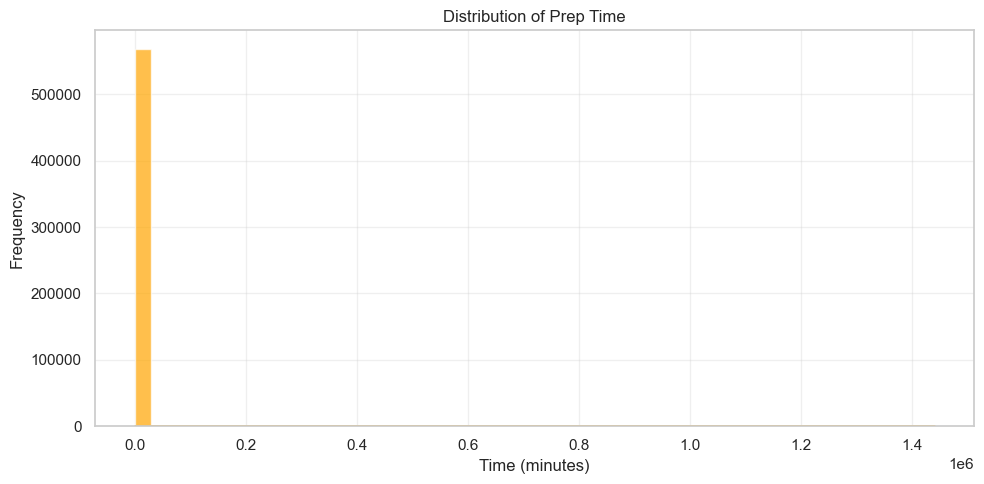

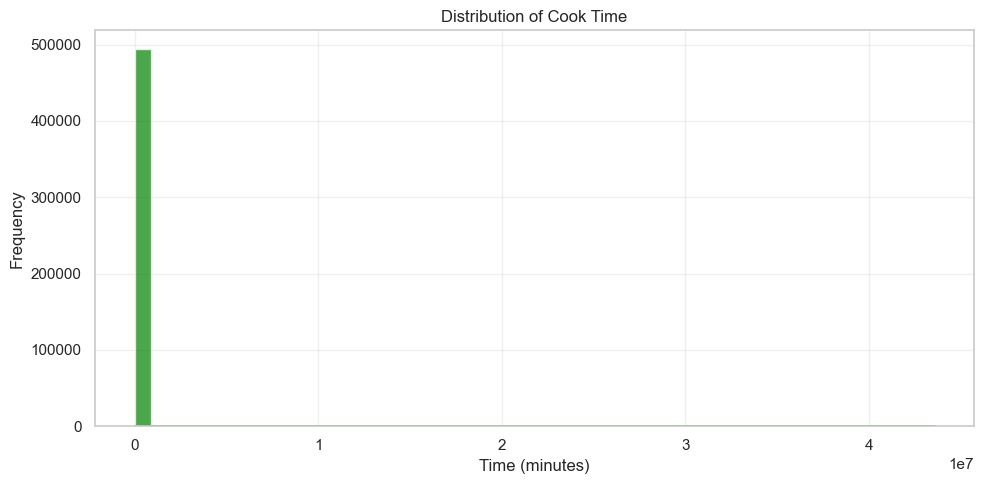

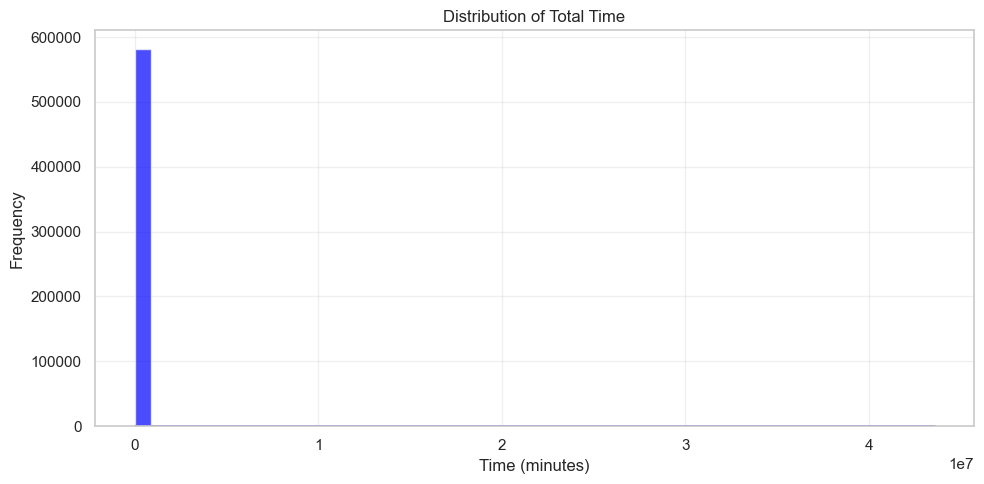

In [20]:
df = pd.read_csv("dataset.csv")
# -----------------------------
# 2. Missing Values Heatmap
# -----------------------------
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

# -----------------------------
# 3. Frequency Plots for Categorical Columns
# -----------------------------
cat_cols = ['Cuisine', 'Category', 'Language', 'Source']

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar', color='teal')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# # -----------------------------
# # 4. Histograms for Numerical Columns
# # -----------------------------
# num_cols = ['Prep Time', 'Cook Time', 'Total Time', 'Ratings', 'Ratings_Count']
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = df.copy()
# df['Prep Time'] = pd.to_numeric(df['Prep Time'], errors='coerce')
# df['Cook Time'] = pd.to_numeric(df['Cook Time'], errors='coerce')
# df['Total Time'] = pd.to_numeric(df['Total Time'], errors='coerce')

# # Remove extreme outliers (e.g., above 99th percentile)
# prep_q99 = df['Prep Time'].quantile(0.99)
# cook_q99 = df['Cook Time'].quantile(0.99)
# total_q99 = df['Total Time'].quantile(0.99)

# df_filtered = df[(df['Prep Time'] <= prep_q99) & (df['Cook Time'] <= cook_q99) & (df['Total Time'] <= total_q99)]

# # Plot Prep Time distribution
# plt.figure(figsize=(10, 5))
# sns.histplot(df_filtered['Prep Time'], bins=50, kde=True, color='orange')
# plt.title('Distribution of Prep Time (Filtered)')
# plt.xlabel('Prep Time (minutes)')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# # Plot Cook Time distribution
# plt.figure(figsize=(10, 5))
# sns.histplot(df_filtered['Cook Time'], bins=50, kde=True, color='green')
# plt.title('Distribution of Cook Time (Filtered)')
# plt.xlabel('Cook Time (minutes)')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 5))
# sns.histplot(df_filtered['Total Time'], bins=50, kde=True, color='green')
# plt.title('Distribution of Total Time (Filtered)')
# plt.xlabel('Total Time (minutes)')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()







# -----------------------------
# 4. Histograms for Numerical Columns
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.copy()
df['Prep Time'] = pd.to_numeric(df['Prep Time'], errors='coerce')
df['Cook Time'] = pd.to_numeric(df['Cook Time'], errors='coerce')
df['Total Time'] = pd.to_numeric(df['Total Time'], errors='coerce')

# First, let's print some basic statistics
print("Prep Time Statistics:")
print(df['Prep Time'].describe())
print("\nCook Time Statistics:")
print(df['Cook Time'].describe())
print("\nTotal Time Statistics:")
print(df['Total Time'].describe())

# Now plot with adjusted parameters
def plot_distribution(data, title, color):
    plt.figure(figsize=(10, 5))
    plt.hist(data.dropna(), bins=50, color=color, alpha=0.7)
    sns.kdeplot(data=data.dropna(), color=color, linewidth=2)
    plt.title(title)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot each distribution
plot_distribution(df['Prep Time'], 'Distribution of Prep Time', 'orange')
plot_distribution(df['Cook Time'], 'Distribution of Cook Time', 'green')
plot_distribution(df['Total Time'], 'Distribution of Total Time', 'blue')

Maximum Prep Time: 1440000.0
Maximum Cook Time: 43545600.0
Maximum Total Time: 43552800.0


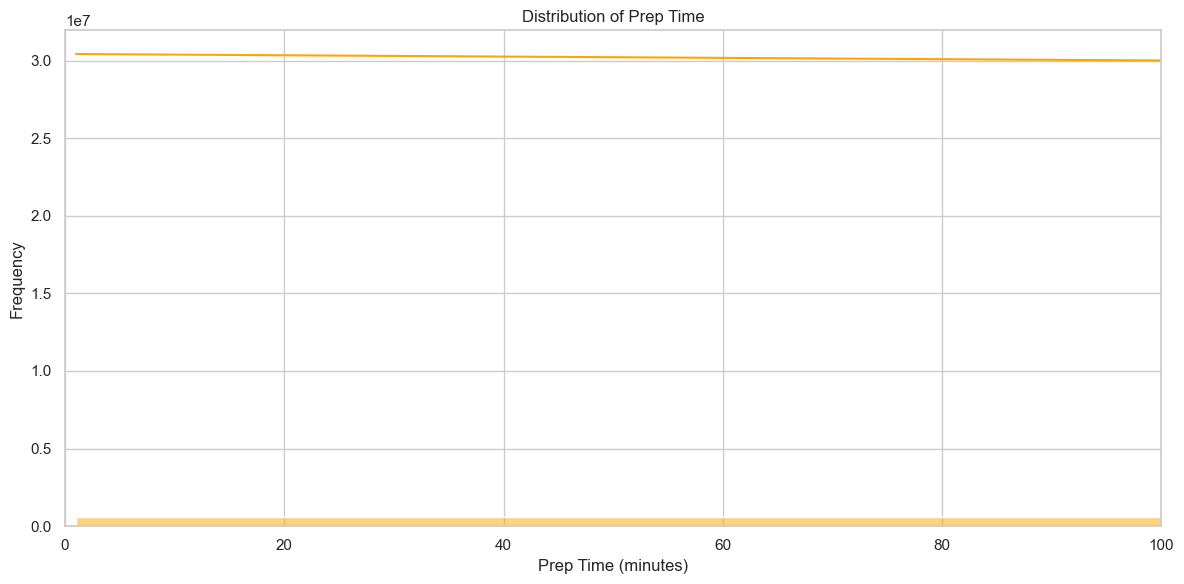

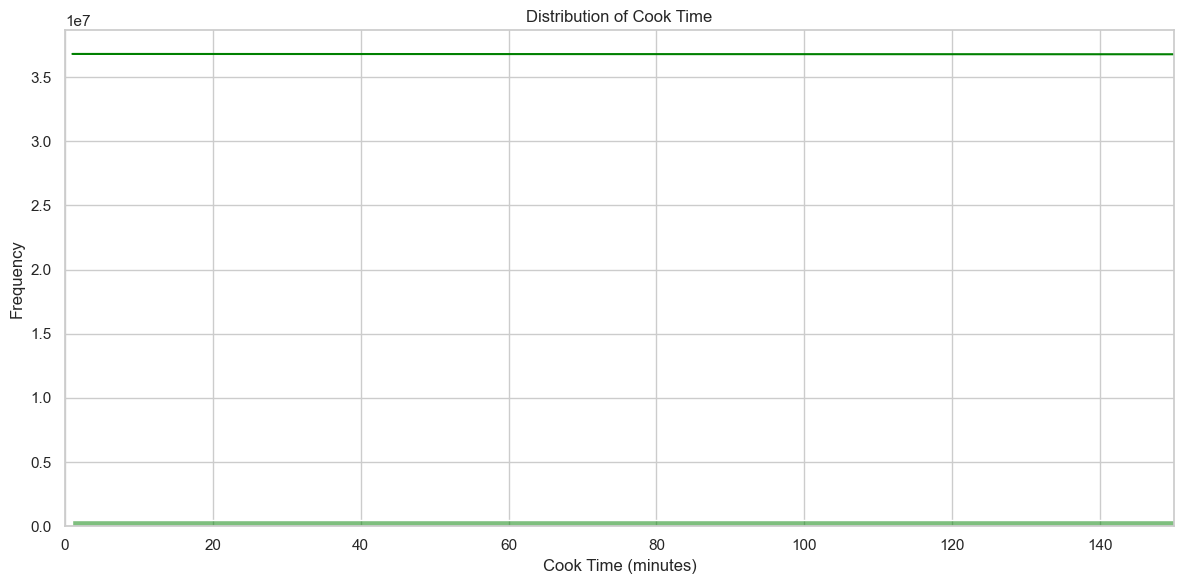

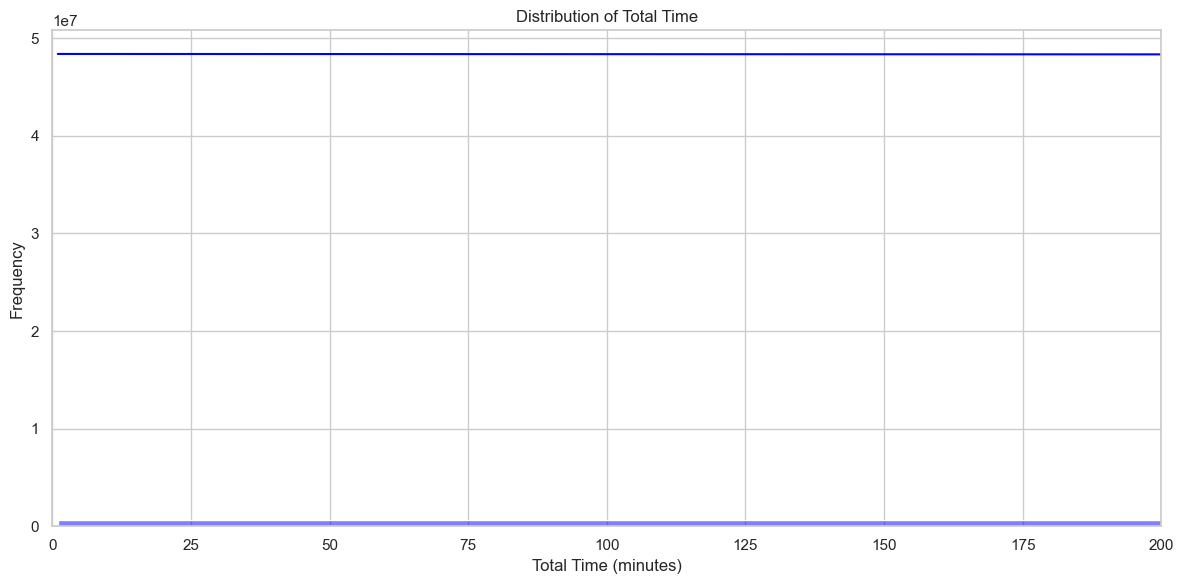

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset.csv")

# Ensure the time columns are numeric
df['Prep Time'] = pd.to_numeric(df['Prep Time'], errors='coerce')
df['Cook Time'] = pd.to_numeric(df['Cook Time'], errors='coerce')
df['Total Time'] = pd.to_numeric(df['Total Time'], errors='coerce')

# Print the maximum values
print("Maximum Prep Time:", df['Prep Time'].max())
print("Maximum Cook Time:", df['Cook Time'].max())
print("Maximum Total Time:", df['Total Time'].max())

# Define a function to plot histograms with focused x-limits
def plot_histogram(data, title, xlabel, color, bin_size=50, x_limit=None):
    plt.figure(figsize=(12, 6))
    sns.histplot(data, bins=bin_size, kde=True, color=color)
    if x_limit:
        plt.xlim(x_limit)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot each time distribution with focused limits
plot_histogram(df['Prep Time'], 'Distribution of Prep Time', 'Prep Time (minutes)', 'orange', bin_size=50, x_limit=(0, 100))
plot_histogram(df['Cook Time'], 'Distribution of Cook Time', 'Cook Time (minutes)', 'green', bin_size=50, x_limit=(0, 150))
plot_histogram(df['Total Time'], 'Distribution of Total Time', 'Total Time (minutes)', 'blue', bin_size=50, x_limit=(0, 200))

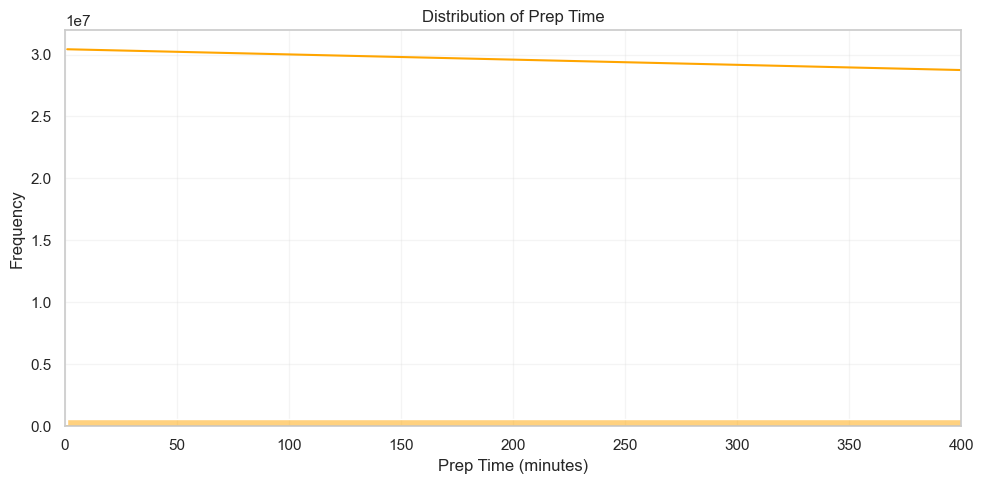

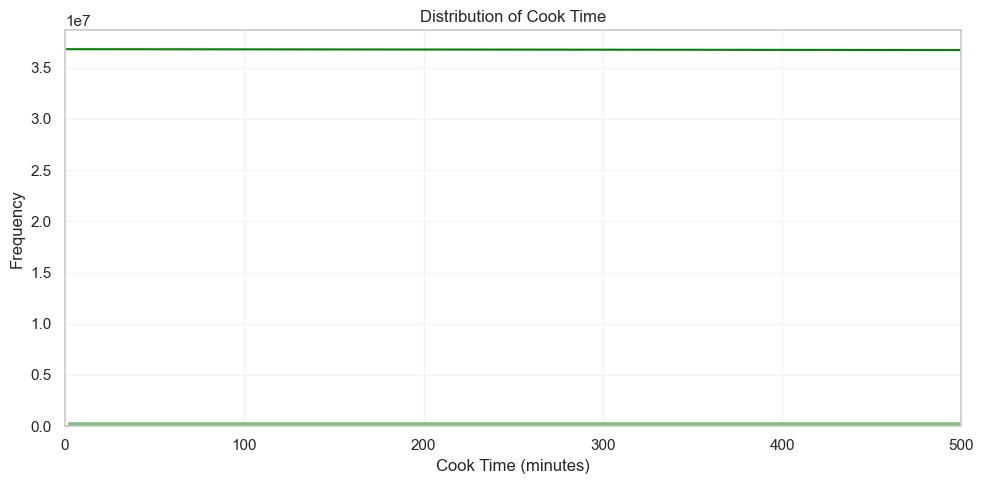

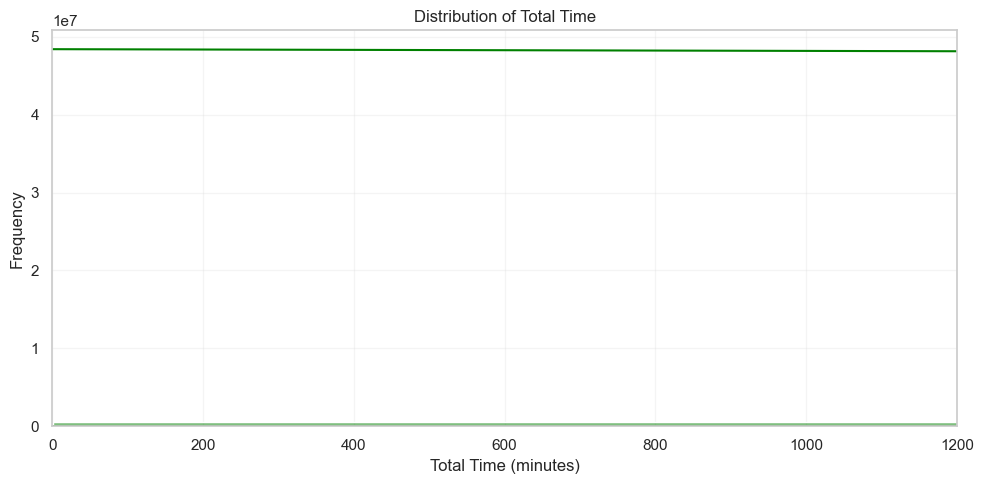

In [21]:
# -----------------------------
# 4. Histograms for Numerical Columns
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.copy()
df['Prep Time'] = pd.to_numeric(df['Prep Time'], errors='coerce')
df['Cook Time'] = pd.to_numeric(df['Cook Time'], errors='coerce')
df['Total Time'] = pd.to_numeric(df['Total Time'], errors='coerce')

# Plot Prep Time distribution
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df['Prep Time'], 
                 bins=50, 
                 kde=True, 
                 color='orange',
                 alpha=0.5)  # Make bars slightly transparent
sns.kdeplot(data=df['Prep Time'], 
            color='orange', 
            linewidth=2)  # Add a more prominent KDE line
plt.title('Distribution of Prep Time')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Plot Cook Time distribution
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df['Cook Time'], 
                 bins=50, 
                 kde=True, 
                 color='green',
                 alpha=0.5)
sns.kdeplot(data=df['Cook Time'], 
            color='green', 
            linewidth=2)
plt.title('Distribution of Cook Time')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Plot Total Time distribution
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df['Total Time'], 
                 bins=50, 
                 kde=True, 
                 color='green',
                 alpha=0.5)
sns.kdeplot(data=df['Total Time'], 
            color='green', 
            linewidth=2)
plt.title('Distribution of Total Time')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 1200)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/2369260966.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


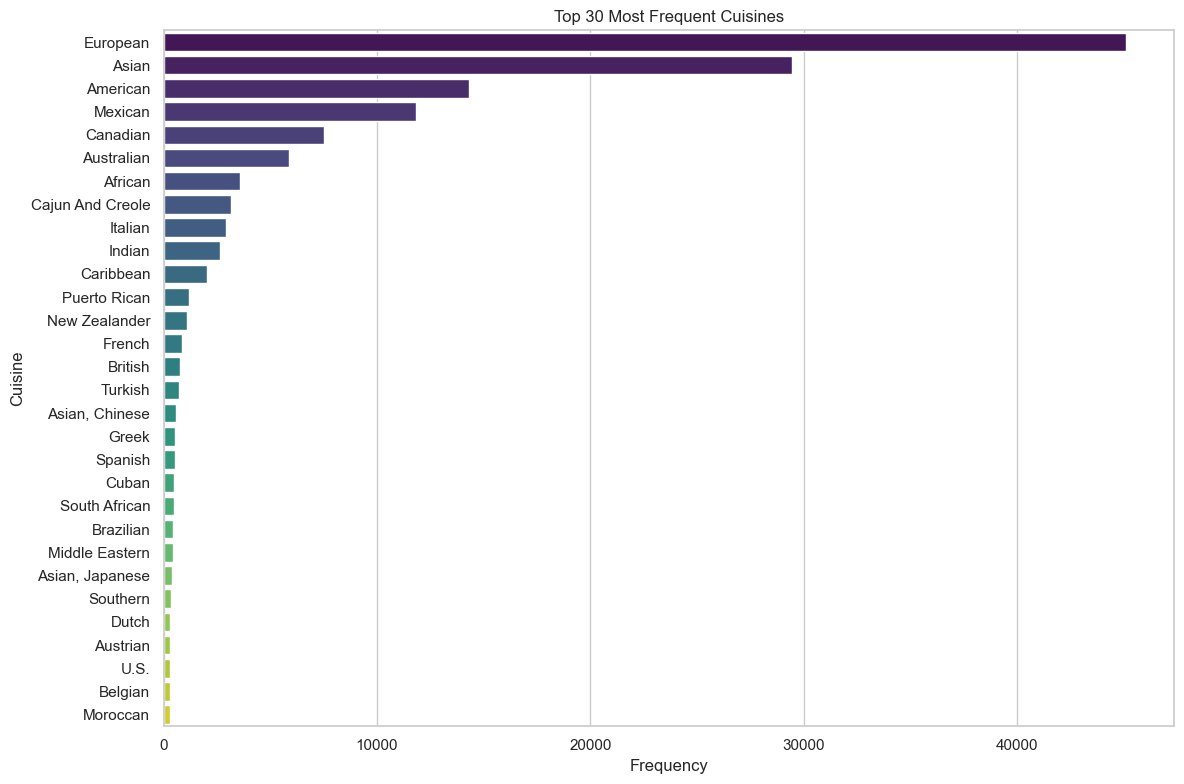

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting aesthetics
sns.set(style="whitegrid")

# Top 30 most common Cuisines (excluding 'Other')
top_cuisines = df['Cuisine'].value_counts()
top_cuisines = top_cuisines[top_cuisines.index != 'Other'].nlargest(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 30 Most Frequent Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# # Top 30 most common Categories (excluding 'Other')
# top_categories = df['Category'].value_counts()
# top_categories = top_categories[top_categories.index != 'Other'].nlargest(100)

# plt.figure(figsize=(12, 18))
# sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
# plt.title('Top 30 Most Frequent Categories')
# plt.xlabel('Frequency')
# plt.ylabel('Category')
# plt.tight_layout()
# plt.show()

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/191033901.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=super_cat_counts.values, y=super_cat_counts.index, palette='viridis')


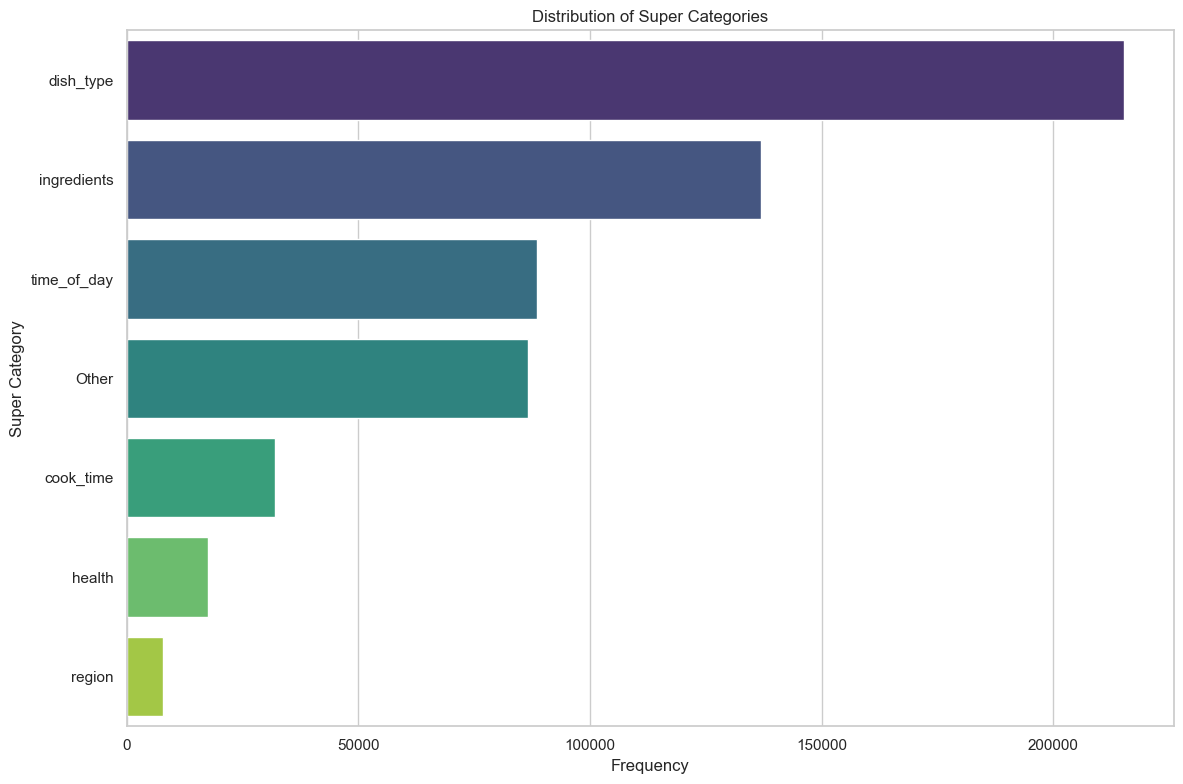

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define category mappings
category_mapping = {
    # 1. Cook time based
    'cook_time': ['< 60 Mins', '< 30 Mins', '< 15 Mins', '< 4 Hours', 'Weeknight'],
    
    # 2. Time of day based
    'time_of_day': [
        'Breakfast', 'Brunch', 'Lunch', 'Dinner', 'Snack',
        'Brunch, Breakfast', 'Lunch, Main', 'Lunch/Snacks',
        'Brunch, Lunch/Snacks', 'Snack, Breakfast',
        'Breakfast, Breads', 'Dinner, Main', 'Dessert, Morning Tea',
        'Brunch, Beverages', 'Brunch, One Dish Meal',
        'Dessert, Breakfast', 'Brunch, Breads',
        'Snack, One Dish Meal', 'Snack, Dessert'
    ],
    
    # 3. Ingredients based
    'ingredients': [
        'Vegetable', 'Meat', 'Chicken', 'Pork', 'Chicken Breast',
        'Potato', 'Cheese', 'Onions', 'Rice', 'Fruit',
        'Grains', 'Yam/Sweet Potato', 'Corn', 'Lamb/Sheep',
        'Crab', 'Spinach', 'Chicken Thigh & Leg', 'Roast Beef',
        'Ham', 'Whole Chicken', 'Greens', 'Tuna', 'Cauliflower',
        'Peppers', 'Black Beans', 'Apple', 'Lentil', 'Long Grain Rice',
        'Penne', 'White Rice', 'Soy/Tofu', 'Pineapple', 'Poultry'
    ],
    
    # 4. Type of dish
    'dish_type': [
        'Dessert', 'One Dish Meal', 'Beverages', 'Sauces',
        'Breads', 'Dessert, Pie', 'Bread, Quick Breads', 'Main',
        'Dessert, Bar Cookie', 'Dessert, Drop Cookies', 'Stew',
        'Bread, Yeast Breads', 'Dessert, Candy',
        'Dessert, Frozen Desserts', 'Salad Dressings',
        'Dessert, Cheesecake', 'Spreads', 'Curries', 'Smoothies',
        'Chowders', 'Savory Pies', 'Spaghetti', 'Punch Beverage',
        'Side Dish', 'Dessert, Tarts', 'Dessert, Gelatin',
        'Clear Soup', 'Salad', 'Dessert, Breads', 'Stocks'
    ],
    
    # 5. Health
    'health': [
        'Low Protein', 'Low Cholesterol', 'Very Low Carbs',
        'Healthy', 'High Protein', 'Kid Friendly'
    ],
    
    # 6. Region
    'region': ['European', 'Asian', 'Mexican']
}

# Function to map category to super category
def get_super_category(category):
    for super_cat, sub_cats in category_mapping.items():
        if category in sub_cats:
            return super_cat
    return 'Other'

# Calculate frequencies for super categories
df['SuperCategory'] = df['Category'].apply(get_super_category)
super_cat_counts = df['SuperCategory'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=super_cat_counts.values, y=super_cat_counts.index, palette='viridis')
plt.title('Distribution of Super Categories')
plt.xlabel('Frequency')
plt.ylabel('Super Category')
plt.tight_layout()
plt.show()

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/3839909267.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=super_cat_counts.values, y=super_cat_counts.index, palette='viridis')


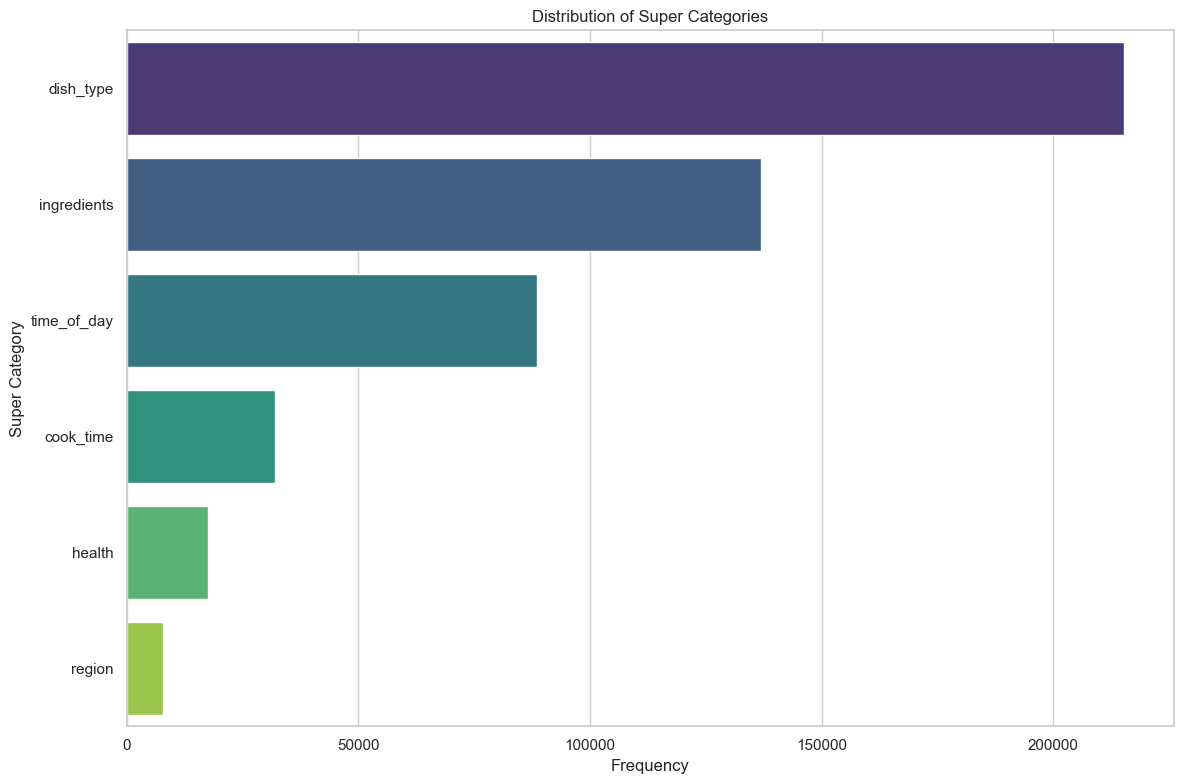


Counts for each super category:
SuperCategory
dish_type      215345
ingredients    136884
time_of_day     88560
cook_time       31966
health          17427
region           7877
Name: count, dtype: int64


In [25]:
# Function to map category to super category
def get_super_category(category):
    for super_cat, sub_cats in category_mapping.items():
        if category in sub_cats:
            return super_cat
    return None  # Return None instead of 'Other'

# Calculate frequencies for super categories
df['SuperCategory'] = df['Category'].apply(get_super_category)
super_cat_counts = df['SuperCategory'].value_counts()

# Remove None/Other category if present
super_cat_counts = super_cat_counts.dropna()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=super_cat_counts.values, y=super_cat_counts.index, palette='viridis')
plt.title('Distribution of Super Categories')
plt.xlabel('Frequency')
plt.ylabel('Super Category')
plt.tight_layout()
plt.show()

# Print the counts for verification
print("\nCounts for each super category:")
print(super_cat_counts)

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/3601629727.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


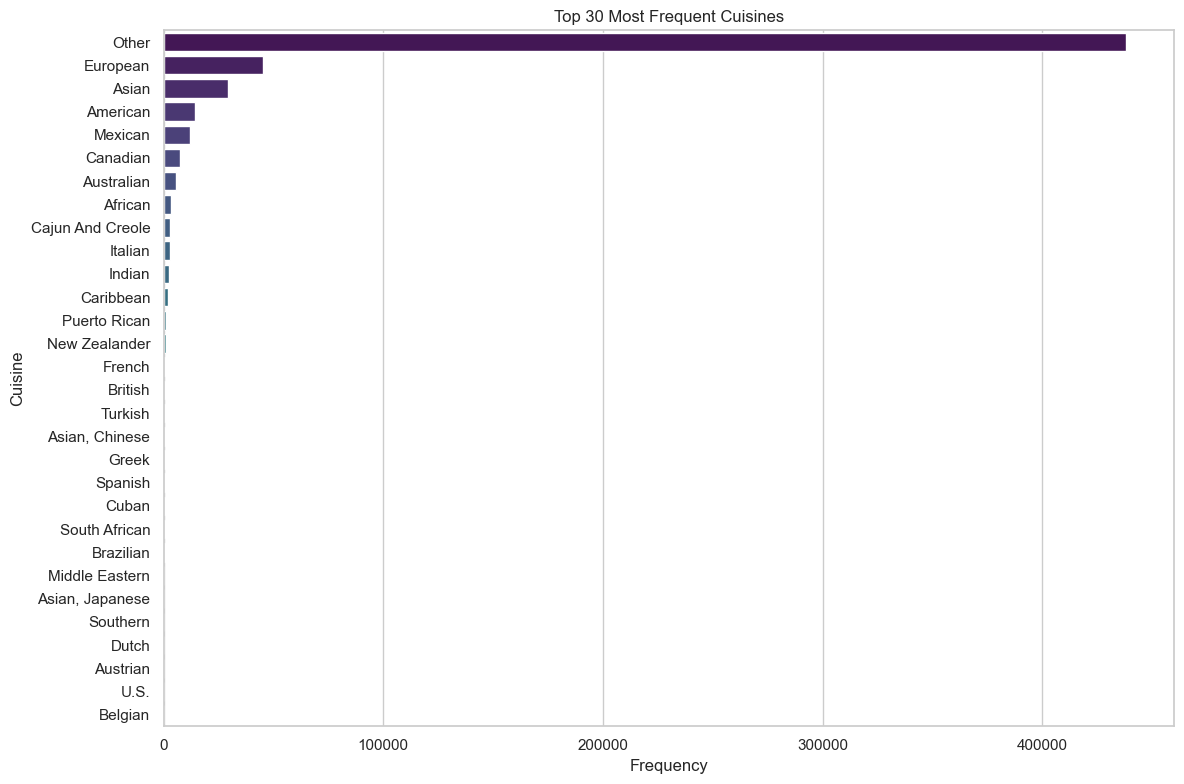

/var/folders/m8/18cr_m5n2xv_m9f9ndn6hdjc0000gn/T/ipykernel_13617/3601629727.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')


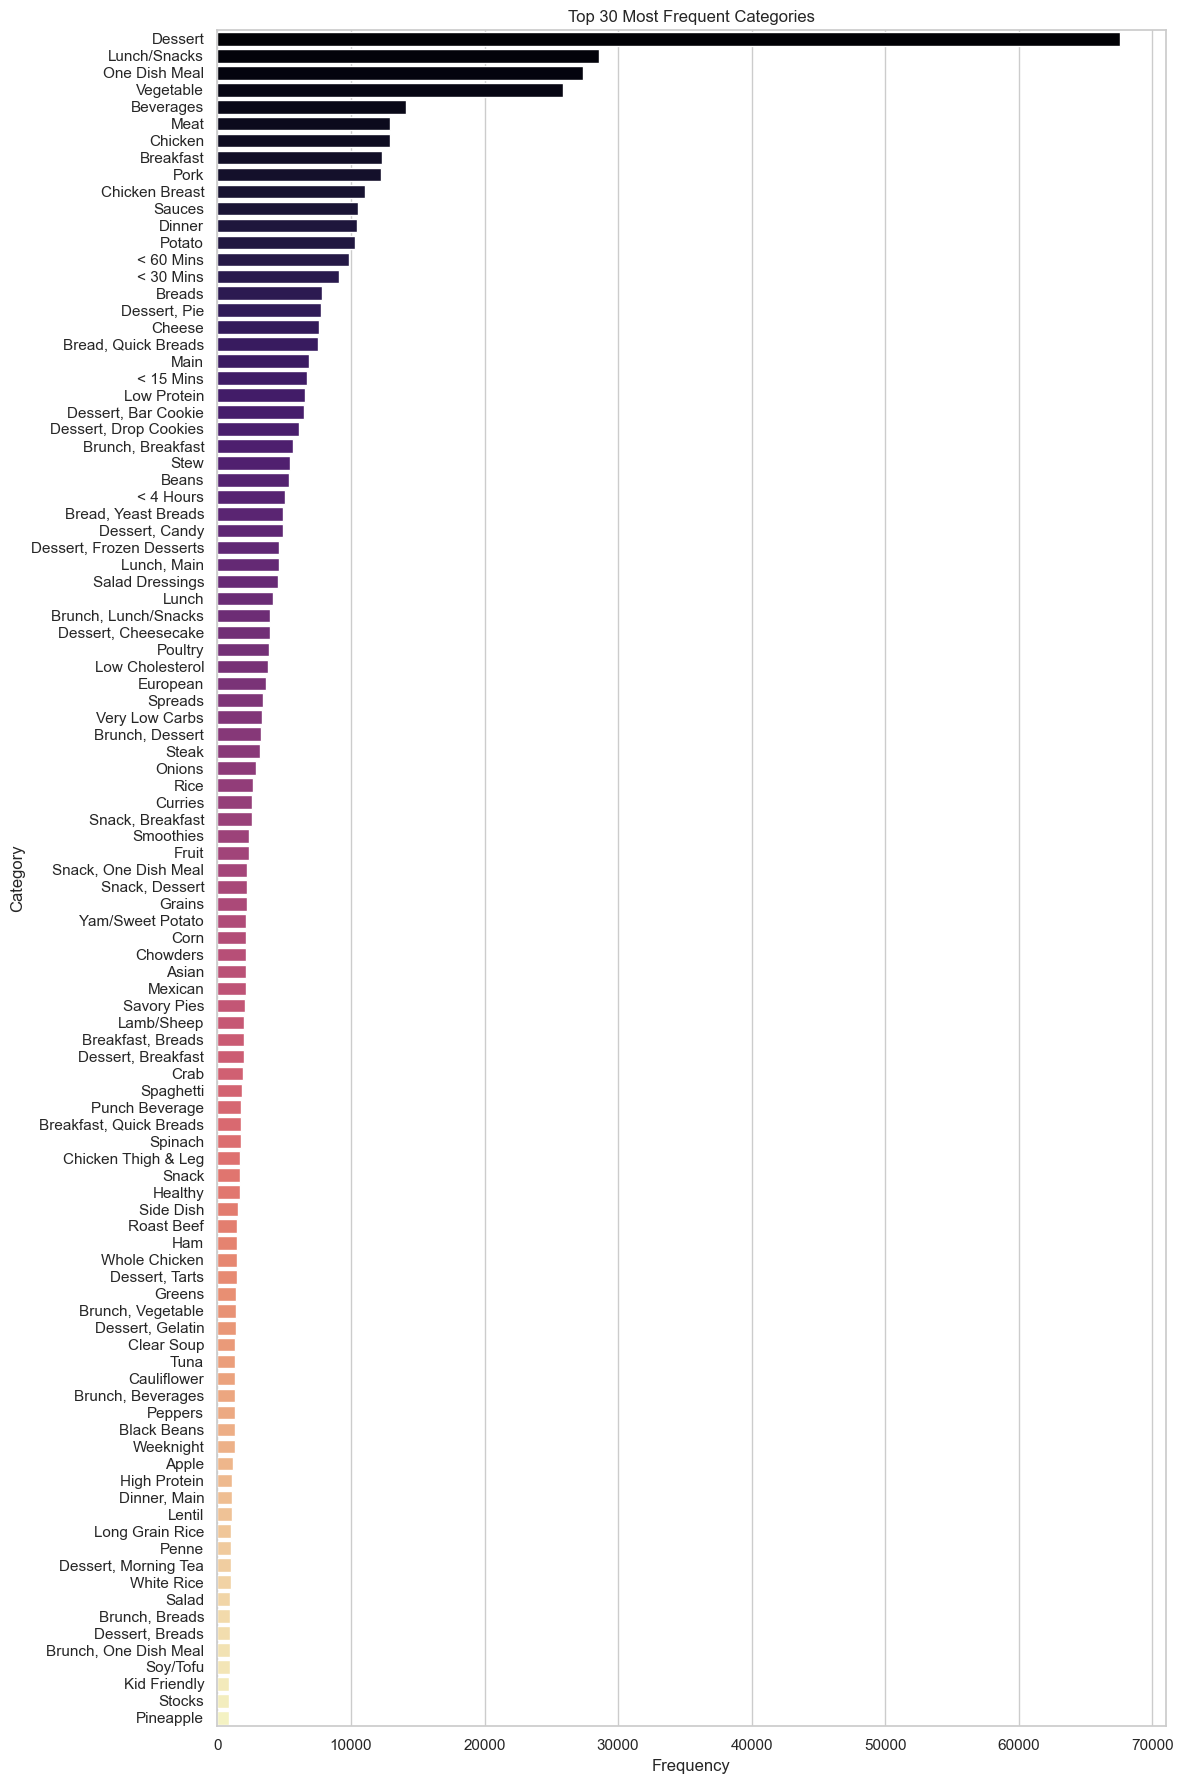

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_file.csv')

# Set up plotting aesthetics
sns.set(style="whitegrid")

# Top 30 most common Cuisines
top_cuisines = df['Cuisine'].value_counts().nlargest(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 30 Most Frequent Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# Top 30 most common Categories
top_categories = df['Category'].value_counts().nlargest(100)

plt.figure(figsize=(12, 18))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')
plt.title('Top 30 Most Frequent Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


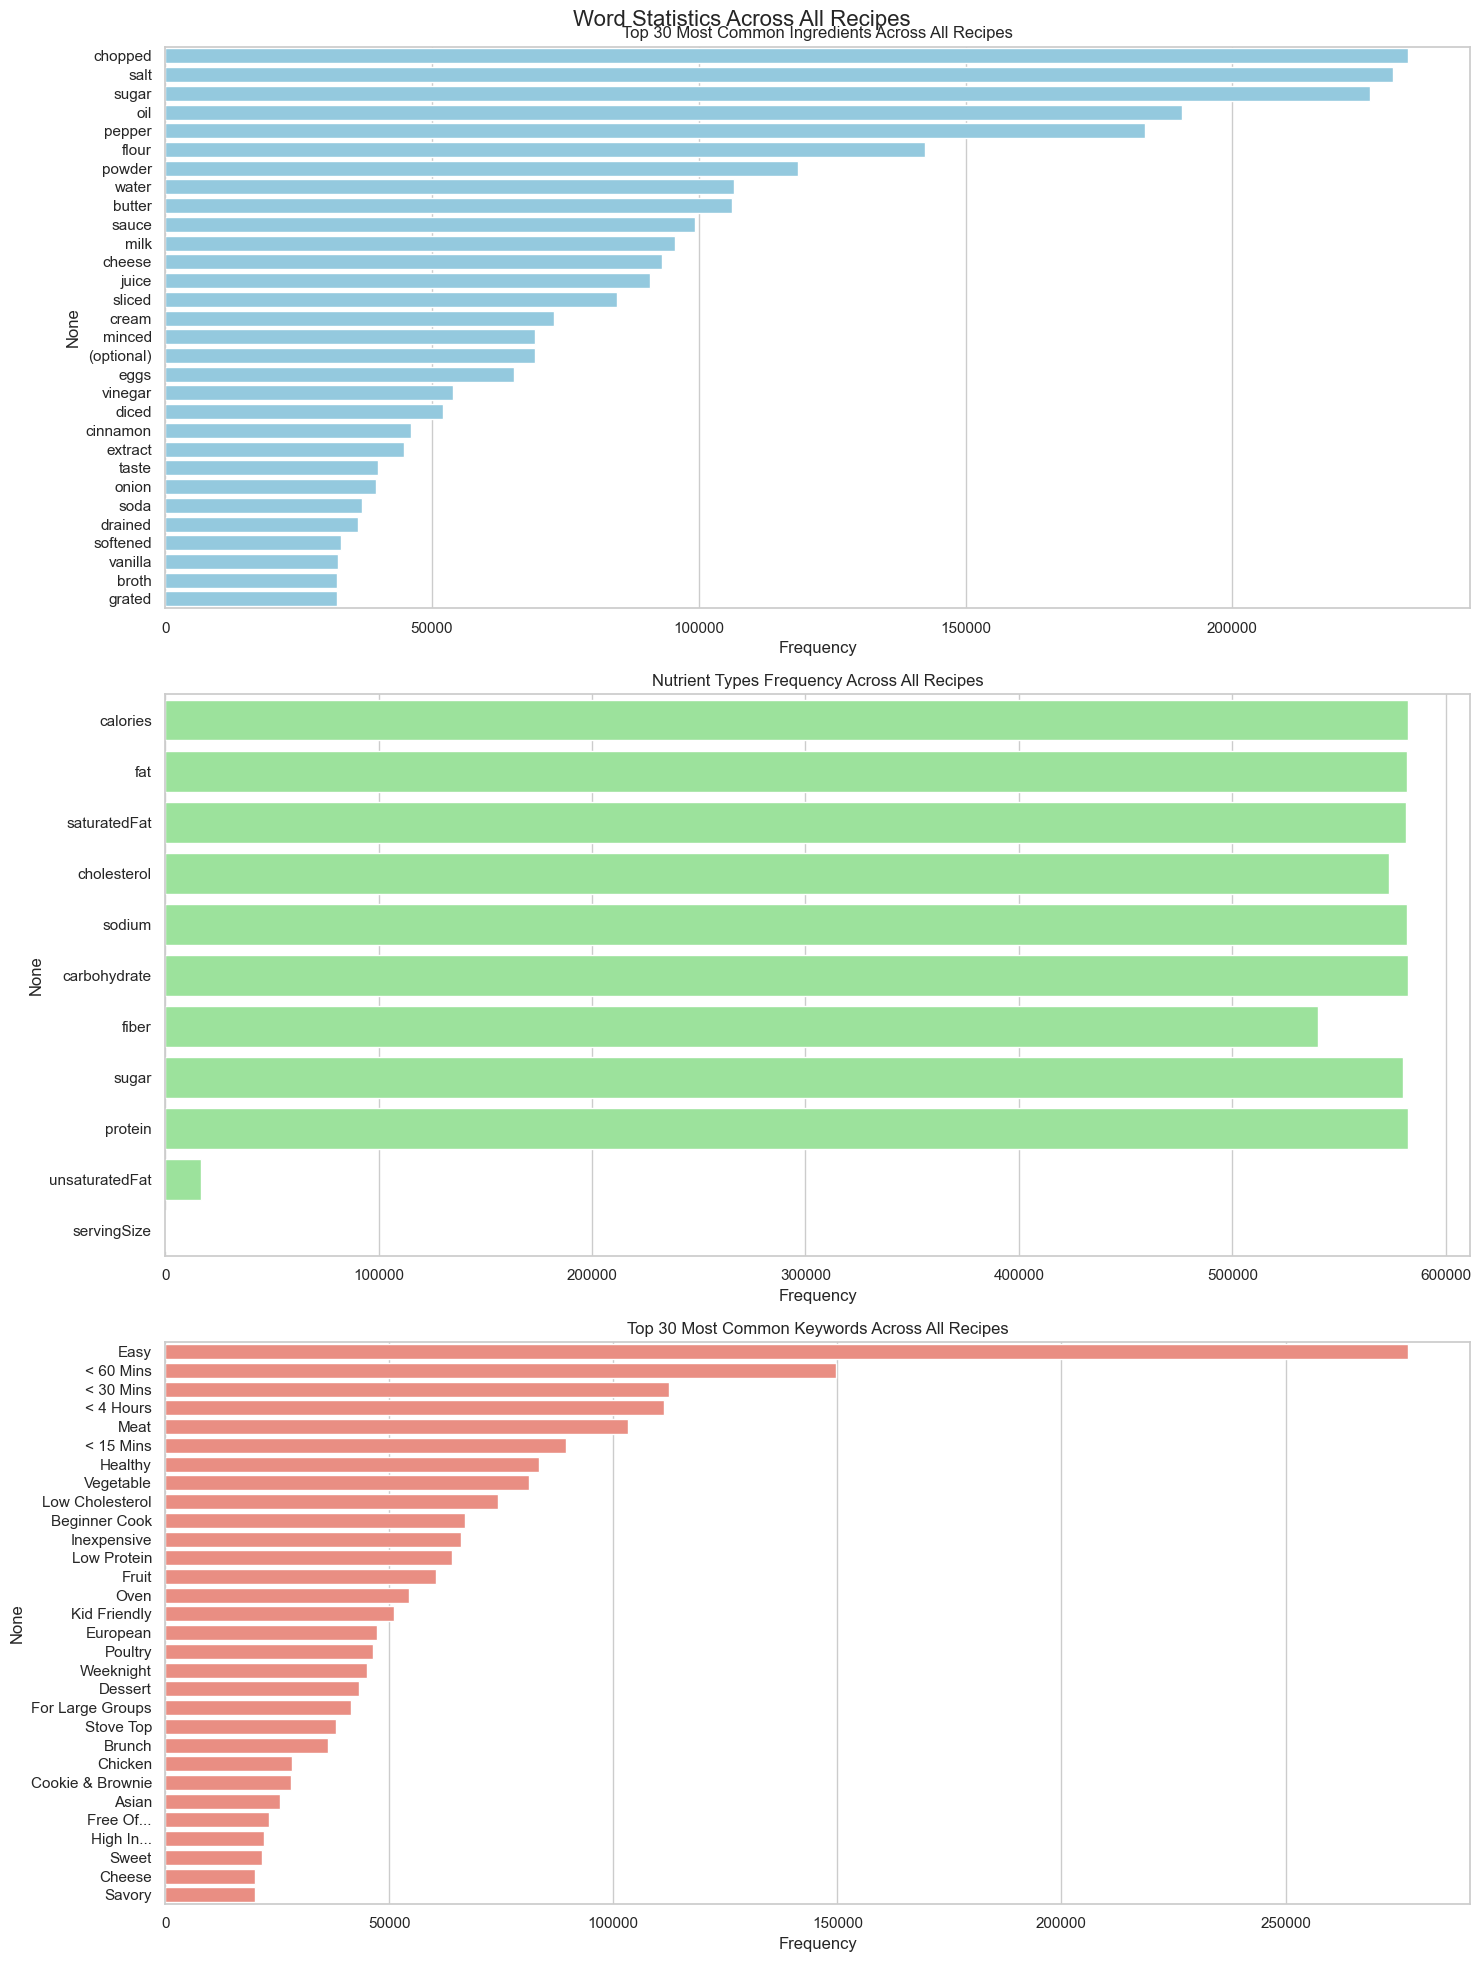


Total unique ingredients: 32427
Total unique nutrients: 11
Total unique keywords: 16067


In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import ast

# def plot_word_statistics(df):
#     # Iterate through each recipe in the dataframe
#     for index, recipe in df.iterrows():
#         try:
#             # Create figure with 3 subplots
#             fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
#             fig.suptitle(f'Word Statistics for Recipe: {recipe["Recipe Name"]} (ID: {recipe["Recipe_ID"]})', fontsize=16)
            
#             # 1. Plot Ingredients
#             ingredients = ast.literal_eval(recipe['Ingredients'])
#             # Clean ingredients
#             cleaned_ingredients = []
#             for ing in ingredients:
#                 words = ing.split()
#                 if len(words) > 0:
#                     cleaned_ingredients.append(words[-1].strip(',').lower())
            
#             # Count ingredients
#             ing_counts = pd.Series(cleaned_ingredients).value_counts()
            
#             # Plot ingredients
#             sns.barplot(x=ing_counts.values, y=ing_counts.index, ax=ax1, color='skyblue')
#             ax1.set_title('Ingredients')
#             ax1.set_xlabel('Count')
            
#             # 2. Plot Nutrients
#             nutrients = ast.literal_eval(recipe['Nutrients'])
#             # Remove 'Content' from keys and convert values to float
#             nutrients = {k.replace('Content', ''): float(v) for k, v in nutrients.items()}
            
#             # Plot nutrients
#             sns.barplot(x=list(nutrients.values()), y=list(nutrients.keys()), ax=ax2, color='lightgreen')
#             ax2.set_title('Nutrients')
#             ax2.set_xlabel('Value')
            
#             # 3. Plot Keywords
#             keywords = ast.literal_eval(recipe['Keywords'])
#             keyword_counts = pd.Series(keywords).value_counts()
            
#             # Plot keywords
#             sns.barplot(x=keyword_counts.values, y=keyword_counts.index, ax=ax3, color='salmon')
#             ax3.set_title('Keywords')
#             ax3.set_xlabel('Count')
            
#             plt.tight_layout()
#             plt.show()
            
#         except Exception as e:
#             print(f"Error processing recipe {recipe['Recipe_ID']}: {str(e)}")
#             continue

# # Read the CSV file
# df = pd.read_csv("dataset.csv")

# # Plot statistics for all recipes
# plot_word_statistics(df)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

def plot_overall_word_statistics(df):
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))
    fig.suptitle('Word Statistics Across All Recipes', fontsize=16)
    
    # 1. Ingredients Statistics
    all_ingredients = []
    for ingredients in df['Ingredients']:
        try:
            ing_list = ast.literal_eval(ingredients)
            # Clean ingredients (take last word of each ingredient)
            cleaned_ing = [ing.split()[-1].strip(',').lower() for ing in ing_list]
            all_ingredients.extend(cleaned_ing)
        except:
            continue
    
    # Get top 30 ingredients
    ing_counts = pd.Series(Counter(all_ingredients)).nlargest(30)
    
    # Plot ingredients
    sns.barplot(x=ing_counts.values, y=ing_counts.index, ax=ax1, color='skyblue')
    ax1.set_title('Top 30 Most Common Ingredients Across All Recipes')
    ax1.set_xlabel('Frequency')
    
    # 2. Nutrients Statistics
    all_nutrients = []
    for nutrients in df['Nutrients']:
        try:
            nut_dict = ast.literal_eval(nutrients)
            # Clean nutrient names
            cleaned_nuts = [k.replace('Content', '') for k in nut_dict.keys()]
            all_nutrients.extend(cleaned_nuts)
        except:
            continue
    
    nut_counts = pd.Series(Counter(all_nutrients))
    
    # Plot nutrients
    sns.barplot(x=nut_counts.values, y=nut_counts.index, ax=ax2, color='lightgreen')
    ax2.set_title('Nutrient Types Frequency Across All Recipes')
    ax2.set_xlabel('Frequency')
    
    # 3. Keywords Statistics
    all_keywords = []
    for keywords in df['Keywords']:
        try:
            key_list = ast.literal_eval(keywords)
            all_keywords.extend(key_list)
        except:
            continue
    
    # Get top 30 keywords
    key_counts = pd.Series(Counter(all_keywords)).nlargest(30)
    
    # Plot keywords
    sns.barplot(x=key_counts.values, y=key_counts.index, ax=ax3, color='salmon')
    ax3.set_title('Top 30 Most Common Keywords Across All Recipes')
    ax3.set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print("\nTotal unique ingredients:", len(set(all_ingredients)))
    print("Total unique nutrients:", len(set(all_nutrients)))
    print("Total unique keywords:", len(set(all_keywords)))

# Run the analysis
plot_overall_word_statistics(df)

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import ast
# from collections import Counter

# def plot_overall_word_statistics(df):
#     # Create figure with 3 subplots
#     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 30))
#     fig.suptitle('Word Statistics Across All Recipes', fontsize=16)
    
#     # 1. Ingredients Statistics
#     all_ingredients = []
#     for ingredients in df['Ingredients']:
#         try:
#             ing_list = ast.literal_eval(ingredients)
#             # Clean ingredients (take last word of each ingredient)
#             cleaned_ing = [ing.split()[-1].strip(',').lower() for ing in ing_list]
#             all_ingredients.extend(cleaned_ing)
#         except:
#             continue
    
#     # Get all ingredients counts
#     ing_counts = pd.Series(Counter(all_ingredients)).sort_values(ascending=True)
    
#     # Plot ingredients
#     sns.barplot(x=ing_counts.values, y=ing_counts.index, ax=ax1, color='skyblue')
#     ax1.set_title('All Ingredients Frequency Across Recipes')
#     ax1.set_xlabel('Frequency')
    
#     # 2. Nutrients Statistics
#     all_nutrients = []
#     for nutrients in df['Nutrients']:
#         try:
#             nut_dict = ast.literal_eval(nutrients)
#             # Clean nutrient names
#             cleaned_nuts = [k.replace('Content', '') for k in nut_dict.keys()]
#             all_nutrients.extend(cleaned_nuts)
#         except:
#             continue
    
#     nut_counts = pd.Series(Counter(all_nutrients)).sort_values(ascending=True)
    
#     # Plot nutrients
#     sns.barplot(x=nut_counts.values, y=nut_counts.index, ax=ax2, color='lightgreen')
#     ax2.set_title('All Nutrient Types Frequency Across Recipes')
#     ax2.set_xlabel('Frequency')
    
#     # 3. Keywords Statistics
#     all_keywords = []
#     for keywords in df['Keywords']:
#         try:
#             key_list = ast.literal_eval(keywords)
#             all_keywords.extend(key_list)
#         except:
#             continue
    
#     # Get all keywords counts
#     key_counts = pd.Series(Counter(all_keywords)).sort_values(ascending=True)
    
#     # Plot keywords
#     sns.barplot(x=key_counts.values, y=key_counts.index, ax=ax3, color='salmon')
#     ax3.set_title('All Keywords Frequency Across Recipes')
#     ax3.set_xlabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()
    
#     # Print statistics
#     print("\nTotal unique ingredients:", len(set(all_ingredients)))
#     print("Total unique nutrients:", len(set(all_nutrients)))
#     print("Total unique keywords:", len(set(all_keywords)))
    
#     # Print top 10 most common for each category
#     print("\nTop 10 most common ingredients:")
#     print(pd.Series(Counter(all_ingredients)).nlargest(10))
    
#     print("\nTop 10 most common nutrients:")
#     print(pd.Series(Counter(all_nutrients)).nlargest(10))
    
#     print("\nTop 10 most common keywords:")
#     print(pd.Series(Counter(all_keywords)).nlargest(10))

# # Run the analysis
# plot_overall_word_statistics(df)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

def plot_sentence_statistics(df):
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    fig.suptitle('Unique Sentence Statistics Across All Recipes', fontsize=16)
    
    # 1. Nutrients Sentence Statistics
    nutrient_sentences = []
    for nutrients in df['Nutrients']:
        try:
            # Keep the exact format of nutrient information as a sentence
            nutrient_sentences.append(str(nutrients))
        except:
            continue
    
    # Count unique nutrient sentences
    nutrient_counts = pd.Series(Counter(nutrient_sentences)).sort_values(ascending=True)
    
    # Plot nutrients
    sns.barplot(x=nutrient_counts.values, y=nutrient_counts.index, ax=ax1, color='lightgreen')
    ax1.set_title('Distribution of Unique Nutrient Information Combinations')
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Nutrient Information')
    
    # 2. Keywords Sentence Statistics
    keyword_sentences = []
    for keywords in df['Keywords']:
        try:
            # Keep the exact format of keywords as a sentence
            keyword_sentences.append(str(keywords))
        except:
            continue
    
    # Count unique keyword sentences
    keyword_counts = pd.Series(Counter(keyword_sentences)).sort_values(ascending=True)
    
    # Plot keywords
    sns.barplot(x=keyword_counts.values, y=keyword_counts.index, ax=ax2, color='salmon')
    ax2.set_title('Distribution of Unique Keyword Combinations')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Keyword Combinations')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nUnique Nutrient Information Combinations:", len(nutrient_counts))
    print("Most common nutrient combination appears:", nutrient_counts.max(), "times")
    
    print("\nUnique Keyword Combinations:", len(keyword_counts))
    print("Most common keyword combination appears:", keyword_counts.max(), "times")
    
    # Print most common combinations
    print("\nTop 5 most common nutrient combinations:")
    print(nutrient_counts.nlargest(5))
    
    print("\nTop 5 most common keyword combinations:")
    print(keyword_counts.nlargest(5))

# Run the analysis
plot_sentence_statistics(df)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1455c4ae0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x392907a60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [8]:
# to check if the given category exists in the dataset or not?

def check_category_existence(df,category):
    if category in df['Category'].unique():
        print(f"✅ The category '{category}' exists in the dataset.")
    else:
        print(f"❌ The category '{category}' does NOT exist in the dataset.")
category = "< 4 Hours"
check_category_existence(df,category)


✅ The category '< 4 Hours' exists in the dataset.


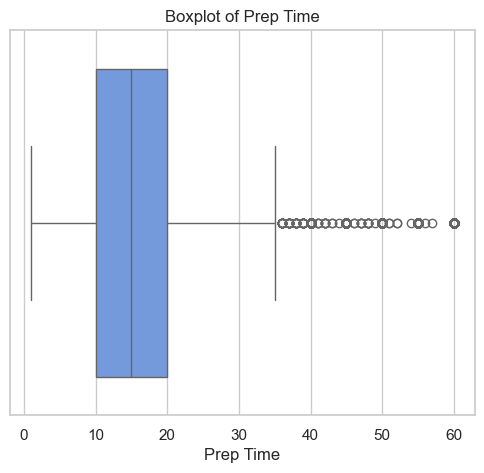

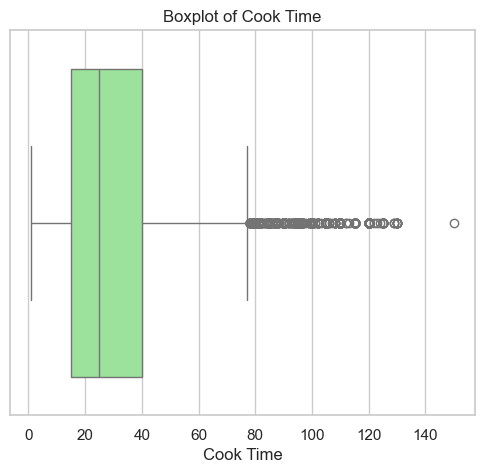

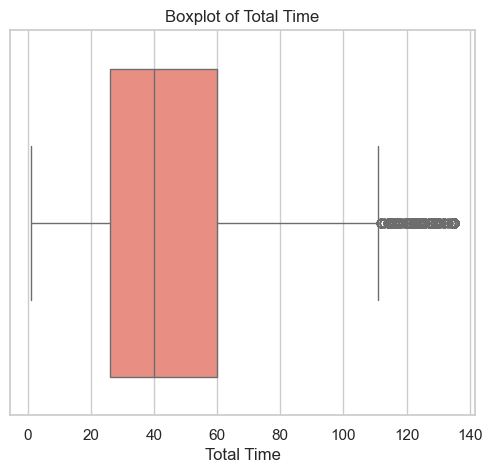

In [9]:
# -----------------------------
# 5. Boxplots for Outlier Detection
# -----------------------------
filtered_df = df.copy()

# Function to remove extreme outliers based on the 95th percentile
def remove_extreme_outliers(df, column, upper_percentile=0.95):
    threshold = df[column].quantile(upper_percentile)
    return df[df[column] <= threshold]

# Apply the outlier removal to each relevant column
for col in ['Prep Time', 'Cook Time', 'Total Time']:
    filtered_df = remove_extreme_outliers(filtered_df, col)

# Plot the updated boxplots one by one
plt.figure(figsize=(6, 5))
sns.boxplot(x=filtered_df['Prep Time'], color='cornflowerblue')
plt.title('Boxplot of Prep Time')
plt.xlabel('Prep Time')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=filtered_df['Cook Time'], color='lightgreen')
plt.title('Boxplot of Cook Time')
plt.xlabel('Cook Time')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x=filtered_df['Total Time'], color='salmon')
plt.title('Boxplot of Total Time')
plt.xlabel('Total Time')
plt.show()


In [10]:
# import pandas as pd
# import ast
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is loaded

# # Parse nutrients dict strings into columns
# def parse_nutrients(nutrients_str):
#     try:
#         return ast.literal_eval(nutrients_str)
#     except:
#         return {}

# nutrients_parsed = df['Nutrients'].apply(parse_nutrients).apply(pd.Series)
# nutrients_parsed = nutrients_parsed.apply(pd.to_numeric, errors='coerce')
# df = pd.concat([df, nutrients_parsed], axis=1)

# nutrient_cols = nutrients_parsed.columns.tolist()

# nutrient_q99 = {col: df[col].quantile(0.99) for col in nutrient_cols}

# # Initialize condition properly as a Series of True values
# nutrient_condition = pd.Series([True] * len(df), index=df.index)
# for col, q99_val in nutrient_q99.items():
#     nutrient_condition &= (df[col] <= q99_val)

# df_filtered = df[nutrient_condition].copy()

# print(f"Original dataframe shape: {df.shape}")
# print(f"Filtered dataframe shape: {df_filtered.shape}")

# plt.figure(figsize=(16, 4 * len(nutrient_cols)))

# for i, col in enumerate(nutrient_cols, 1):
#     plt.subplot(len(nutrient_cols), 1, i)
#     sns.histplot(df_filtered[col].dropna(), bins=30, kde=True, color='skyblue')
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


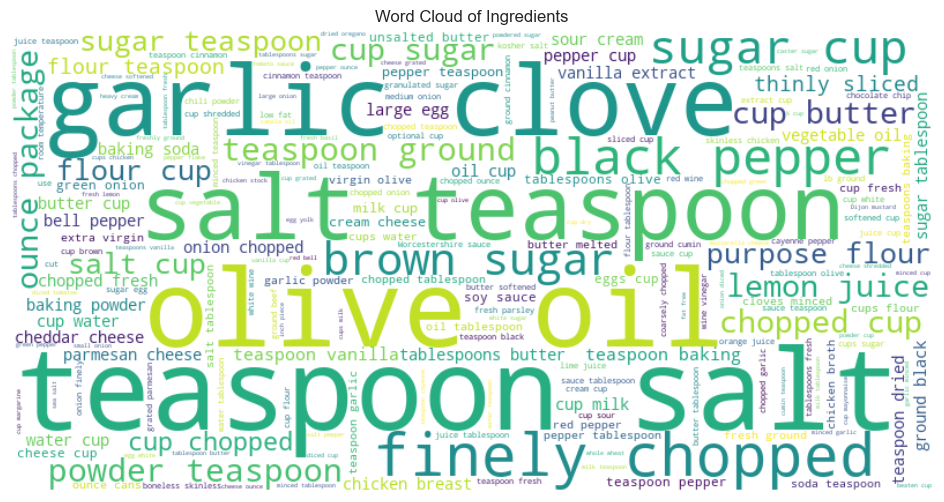

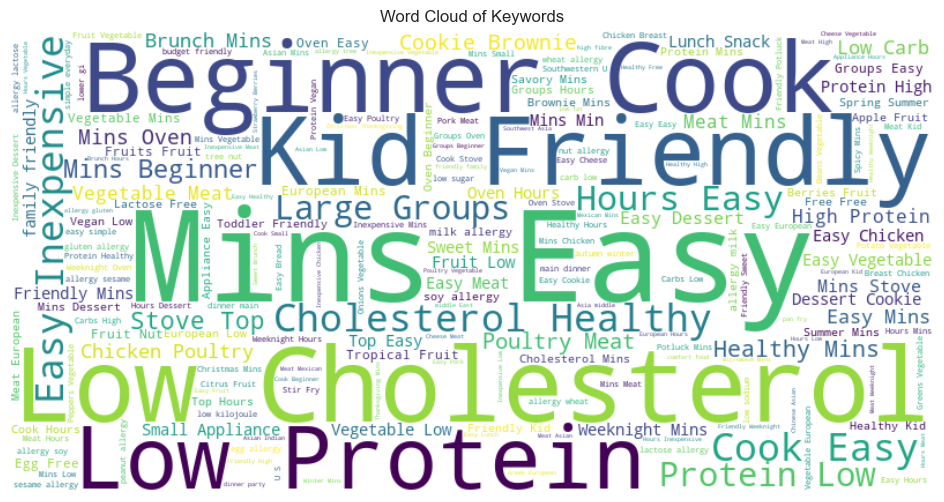

In [11]:

# -----------------------------
# 6. WordCloud: Ingredients
# -----------------------------

def flatten_ingredient_list(ingredient_col):
    combined = []
    for row in ingredient_col:
        try:
            ingredients = ast.literal_eval(row)
            combined.extend(ingredients)
        except:
            continue
    return " ".join(combined)

ingredients_text = flatten_ingredient_list(df["Ingredients"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Ingredients")
plt.show()

# -----------------------------
# 7. WordCloud: Keywords
# -----------------------------
keywords_text = flatten_ingredient_list(df["Keywords"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Keywords")
plt.show()


In [36]:
def print_unique_entries(df):
    print("Unique Entries for Each Column:")
    print("-" * 50)
    
    for column in df.columns:
        try:
            unique_count = df[column].nunique()
            print(f"\n{column}:")
            print(f"Number of unique entries: {unique_count}")
            
            # For columns that might have lists or dictionaries stored as strings
            if column in ['Ingredients', 'Directions', 'Nutrients', 'Keywords']:
                print("(Stored as lists/dictionaries - counting unique strings)")
            
            # For numerical columns, show some basic stats
            if df[column].dtype in ['int64', 'float64']:
                print(f"Min: {df[column].min()}")
                print(f"Max: {df[column].max()}")
                print(f"Mean: {df[column].mean():.2f}")
            
            # For columns with reasonable number of unique values, print them
            if unique_count < 50 and column not in ['Recipe_ID', 'Recipe Name', 'URL', 'Image_URL', 'Description']:
                unique_values = df[column].unique()
                print("Unique values:")
                for val in unique_values:
                    print(f"- {val}")
            
            print("-" * 50)
            
        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            print("-" * 50)
            continue

# Run the analysis
print_unique_entries(df)

Unique Entries for Each Column:
--------------------------------------------------

Recipe_ID:
Number of unique entries: 584639
Min: 1
Max: 584639
Mean: 292320.00
--------------------------------------------------

Recipe Name:
Number of unique entries: 492617
--------------------------------------------------

Cuisine:
Number of unique entries: 656
--------------------------------------------------

Category:
Number of unique entries: 1208
--------------------------------------------------

Prep Time:
Number of unique entries: 426
Min: 1.0
Max: 1440000.0
Mean: 55.92
--------------------------------------------------

Cook Time:
Number of unique entries: 515
Min: 1.0
Max: 43545600.0
Mean: 215.42
--------------------------------------------------

Total Time:
Number of unique entries: 1349
Min: 1.0
Max: 43552800.0
Mean: 240.48
--------------------------------------------------

Servings:
Number of unique entries: 1122
--------------------------------------------------

Ingredients:
Numb